# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Throughout the study highest number of timepoints are studied using the drug Capomulin and least number of timepoints are observed using Propriva

In the sample of mice, number of male and female mice are almost equal. But there are slightly higher number of male mice in the sample, which is 5.7% from the entire sample.

Final Tumor volumes of mice tested with Infubinol and Ceftamin are comparatively higher than the final tumor values of mice tested with Capomulin and Ramicane.

When considering Capomulin drug regimen mouse weight and average tumor volume is having a positive correlation of 0.84. That means the average tumor volume of mice tested with Capomulin increases with the weight of the mouse.

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
# print(merged_data)

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
print("Number of Mice = ", number_of_mice)

Number of Mice =  249


In [125]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = merged_data[merged_data.duplicated(subset=['Mouse ID'], keep=False)]

duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned_data = cleaned_data['Mouse ID'].nunique()
print("Number of Mice = ", number_of_mice_cleaned_data)

Number of Mice =  249


## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor_volume = grouped_df.mean().reset_index()
mean_tumor_volume = mean_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})

median_tumor_volume = grouped_df.median().reset_index()
median_tumor_volume = median_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})

var_tumor_volume = grouped_df.var().reset_index()
var_tumor_volume = var_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Vaience'})

std_tumor_volume = grouped_df.std().reset_index()
std_tumor_volume = std_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})

sem_tumor_volume = grouped_df.sem().reset_index()
sem_tumor_volume = sem_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

summary_statistics_merged = pd.merge(mean_tumor_volume, median_tumor_volume, on='Drug Regimen')
summary_statistics_merged = pd.merge(summary_statistics_merged, var_tumor_volume, on='Drug Regimen')
summary_statistics_merged = pd.merge(summary_statistics_merged, std_tumor_volume, on='Drug Regimen')
summary_statistics_merged = pd.merge(summary_statistics_merged, sem_tumor_volume, on='Drug Regimen')

summary_statistics_merged

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Vaience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [129]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Vaience',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Vaience,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total number of rows (Mouse ID/Timepoints) for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

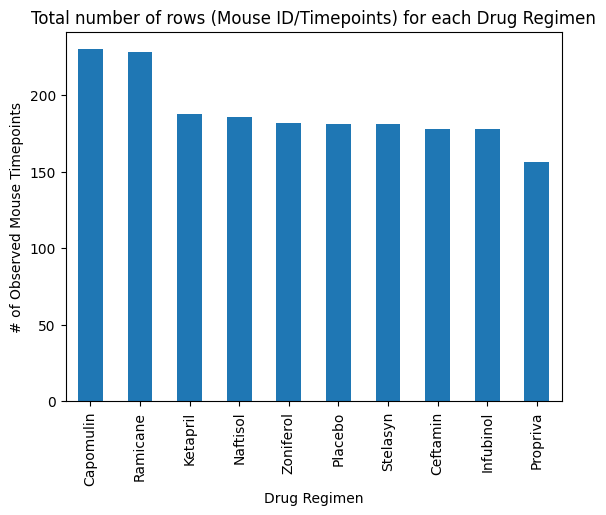

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_timepoint_counts = cleaned_data.groupby('Drug Regimen').size()

# Sort
mouse_timepoint_counts = mouse_timepoint_counts.sort_values(ascending=False)

# Plot
mouse_timepoint_counts.plot(
    kind='bar', 
    rot=90, 
    title='Total number of rows (Mouse ID/Timepoints) for each Drug Regimen', 
    xlabel='Drug Regimen', 
    ylabel='# of Observed Mouse Timepoints')

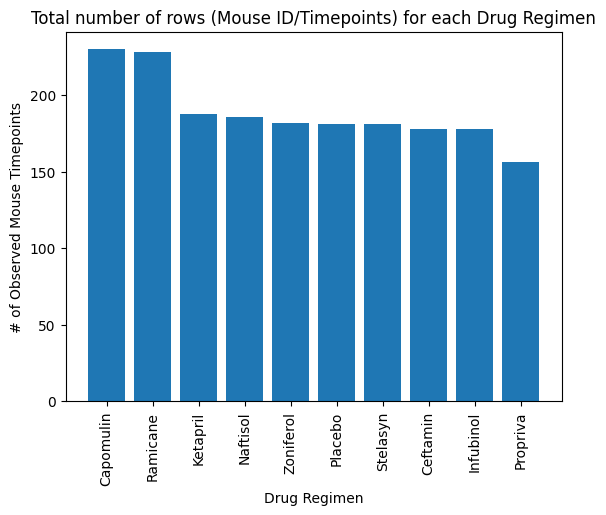

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_timepoint_counts = cleaned_data.groupby('Drug Regimen').size()

# Sort
mouse_timepoint_counts = mouse_timepoint_counts.sort_values(ascending=False)

plt.bar(mouse_timepoint_counts.index, mouse_timepoint_counts)

plt.title('Total number of rows (Mouse ID/Timepoints) for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='Sex'>

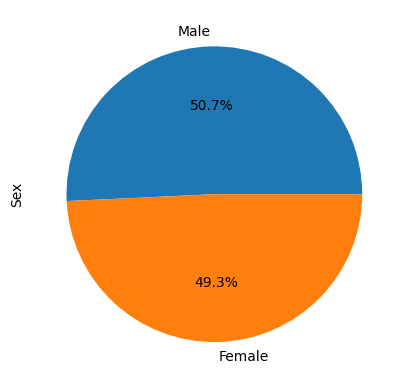

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex_df = cleaned_data.groupby('Sex').size()

# sort
mice_sex_df = mice_sex_df.sort_values(ascending=False)

mice_sex_df.plot(kind='pie', ylabel='Sex', autopct='%1.1f%%')


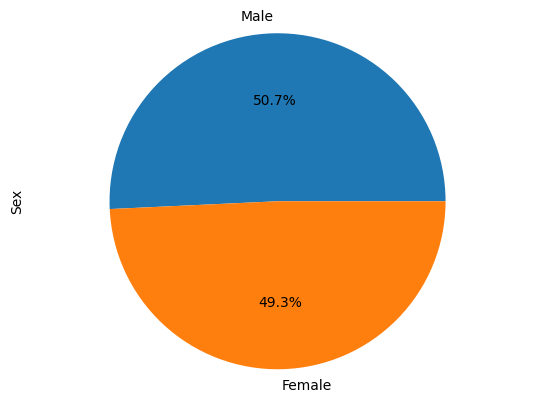

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_sex_df, labels=mice_sex_df.index, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [131]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_df = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')


In [132]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_lists = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments_list:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = max_timepoints_df.loc[max_timepoints_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_lists.append(tumor_vols.reset_index())
    
    # Determine outliers using upper and lower bounds

    q1 = tumor_vols.quantile(0.25)
    q3 = tumor_vols.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = tumor_vols[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]

    print(treatment + "'s potential outliers:", outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


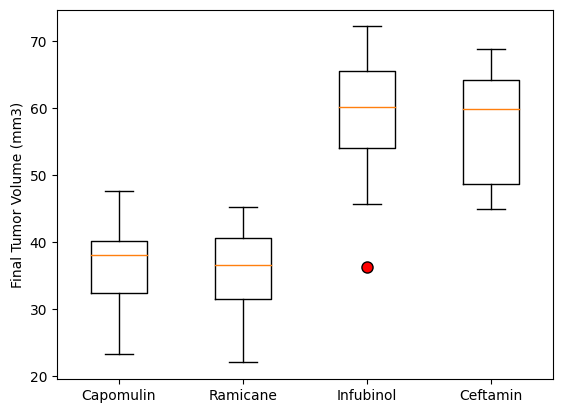

In [133]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(
    [tumor_vol_list['Tumor Volume (mm3)'] for tumor_vol_list in tumor_vol_lists],
     flierprops=dict(marker='o', markerfacecolor='red', markersize=8)
    )

plt.xticks(range(1, len(tumor_vol_lists) + 1), treatments_list)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

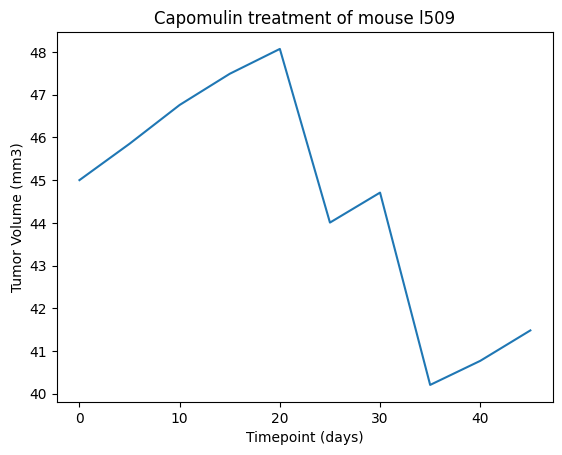

In [134]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

mouse_df = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id)  & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Line plot

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse ' + mouse_id)

plt.show()

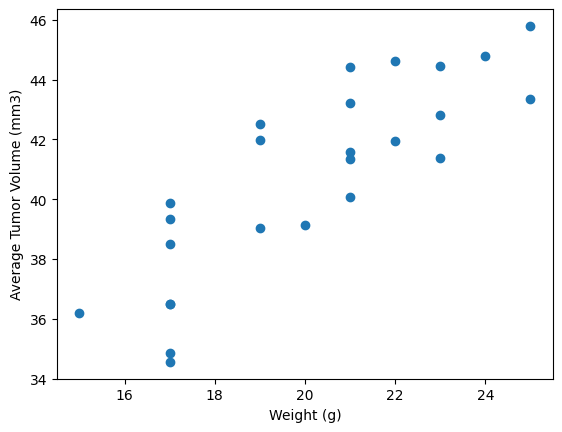

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

average_vols = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
weights_df = capomulin_df.groupby('Mouse ID')['Weight (g)'].max().reset_index()
average_vols_df = pd.merge(weights_df, average_vols, on=['Mouse ID'])

plt.scatter(average_vols_df['Weight (g)'], average_vols_df['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


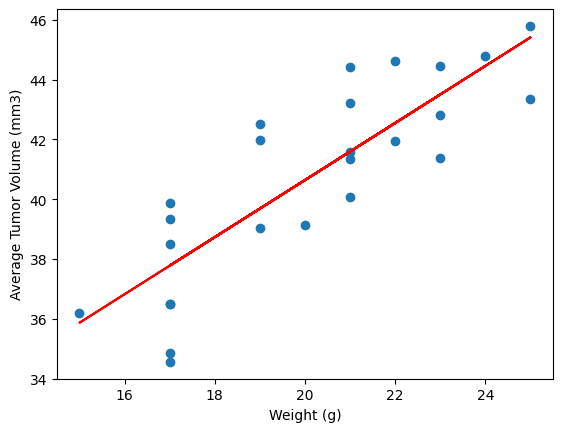

In [136]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation coefficient
correlation_coefficient = average_vols_df['Weight (g)'].corr(average_vols_df['Tumor Volume (mm3)'])
print("The correlation between mouse weight and the average tumor volume is ", round(correlation_coefficient, 2))

# Scatter plot
plt.scatter(average_vols_df['Weight (g)'], average_vols_df['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# linear regression model

slope, intercept, r_value, p_value, std_err = st.linregress(average_vols_df['Weight (g)'], average_vols_df['Tumor Volume (mm3)'])

# Plot linear regression line
plt.plot(average_vols_df['Weight (g)'], slope * average_vols_df['Weight (g)'] + intercept, color='red')


plt.show()
